# Boxplots

In [1]:
import os.path
import pandas as pd
from matplotlib import pyplot as plt
from dmdu.general.visualization import plot_boxplots
from ema_workbench import load_results
from model.enumerations import ProblemFormulation

In [2]:
outcome_names = ['Damages', 'Atmospheric Temperature', 'Industrial Emission']
year = 2105


In [3]:
problem_formulations = [
    ProblemFormulation.UTILITARIAN_AGGREGATED,
    ProblemFormulation.UTILITARIAN_DISAGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_AGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_DISAGGREGATED
]

dict_list = []

data_directory = os.path.join(
    os.path.dirname(os.getcwd()),
    'data'
)

## Load results with reference scenarios


In [4]:
ref_dict = {}
for pf in problem_formulations:

    file_directory = os.path.join(
        data_directory,
        'experimentsreferences',
        f'results_{pf.name}'
    )
    _, outcomes = load_results(file_directory)
    outcomes = pd.DataFrame(outcomes)
    ref_dict[pf.name] = outcomes

dict_list.append(ref_dict)

## Load results with 50 bad scenarios


In [5]:
bad_dict = {}
for pf in problem_formulations:

    file_directory = os.path.join(
        data_directory,
        'experiments_bad',
        f'results_{pf.name}'
    )
    _, outcomes = load_results(file_directory)
    outcomes = pd.DataFrame(outcomes)

    bad_dict[pf.name] = outcomes

dict_list.append(bad_dict)

## Load results with random scenarios


In [6]:
random_dict = {}
for pf in problem_formulations:

    file_directory = os.path.join(
        data_directory,
        'experimentsextensive',
        f'results_{pf.name}'
    )
    _, outcomes = load_results(file_directory)
    outcomes = pd.DataFrame(outcomes)
    random_dict[pf.name] = outcomes

dict_list.append(random_dict)

[]

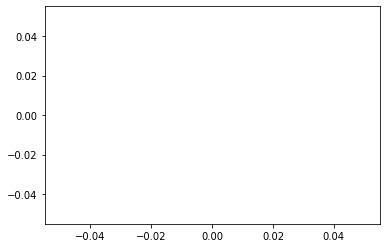

In [7]:
plt.plot()

## Visualization

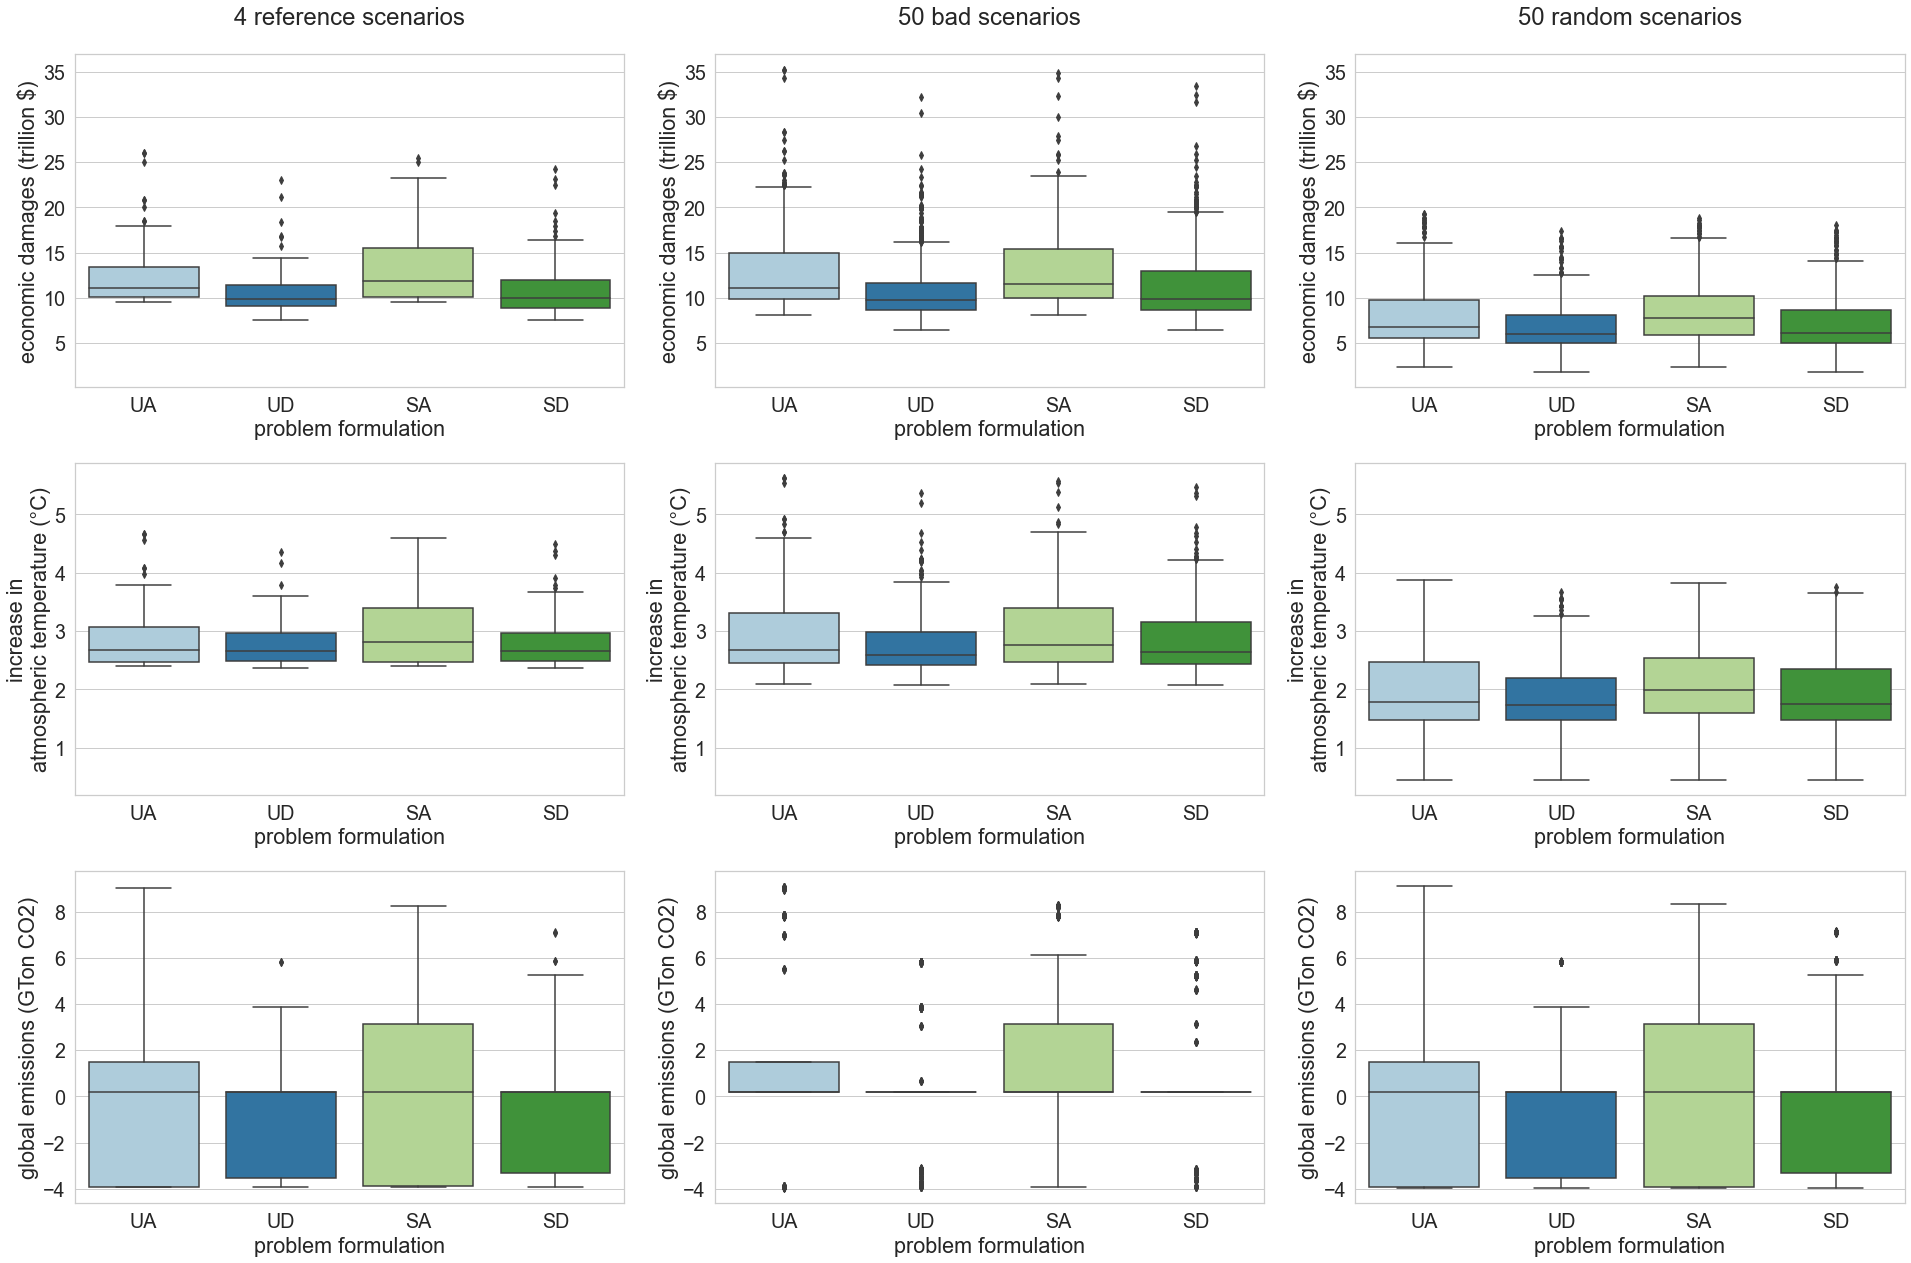

In [8]:
plot_boxplots(
    dict_list=dict_list,
    outcome_names=outcome_names,
    year=year,
    saving=True,
    file_name='boxplots_damages_temp_emissions'
)

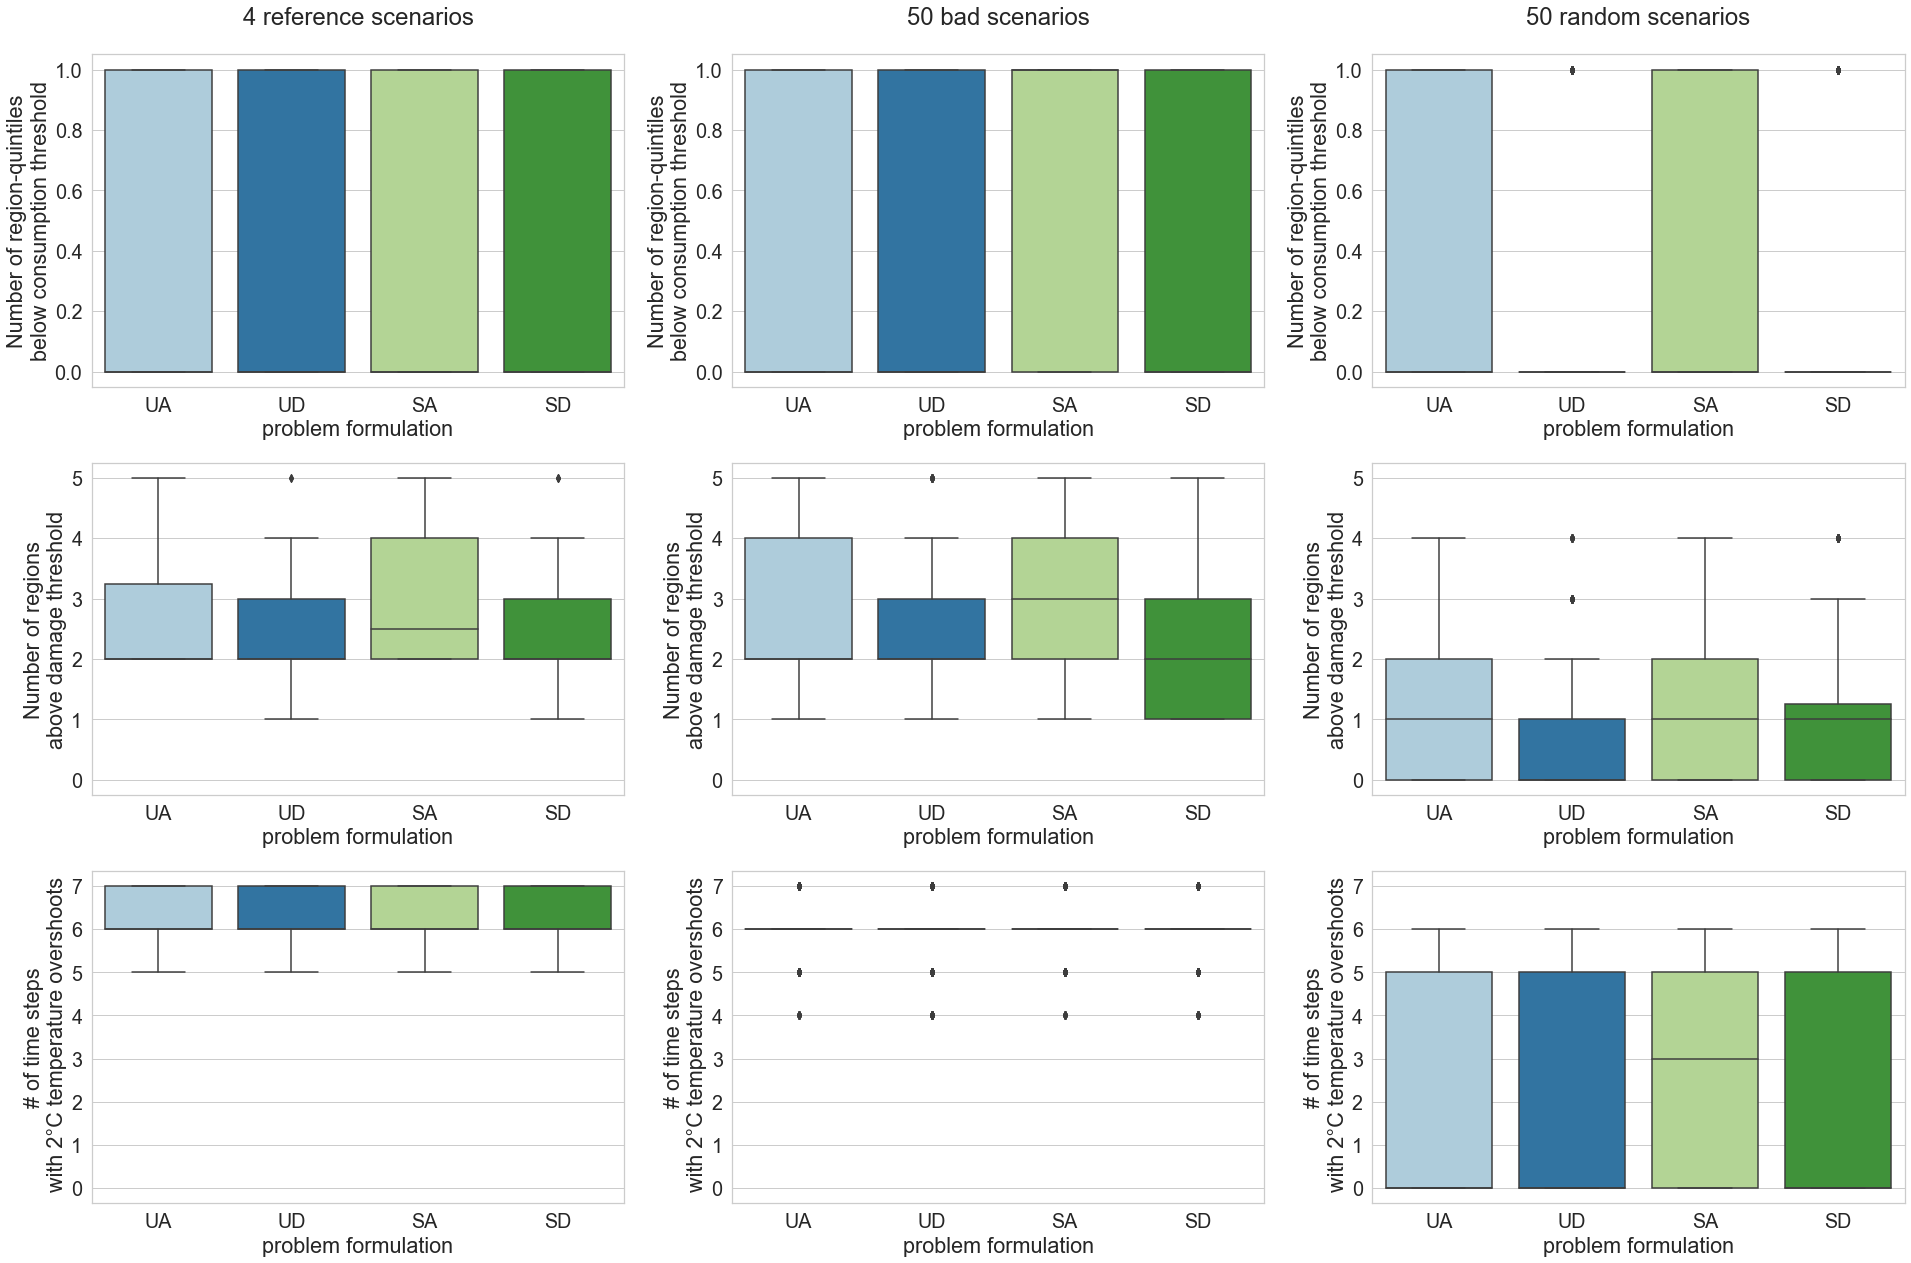

In [9]:
outcome_names = [
    'Number of regions below consumption threshold',
    'Number of regions above damage threshold',
    'Temperature overshoot',
]

plot_boxplots(
    dict_list=dict_list,
    outcome_names=outcome_names,
    year=year,
    saving=True,
    file_name='boxplots_regions_overshoots'
)

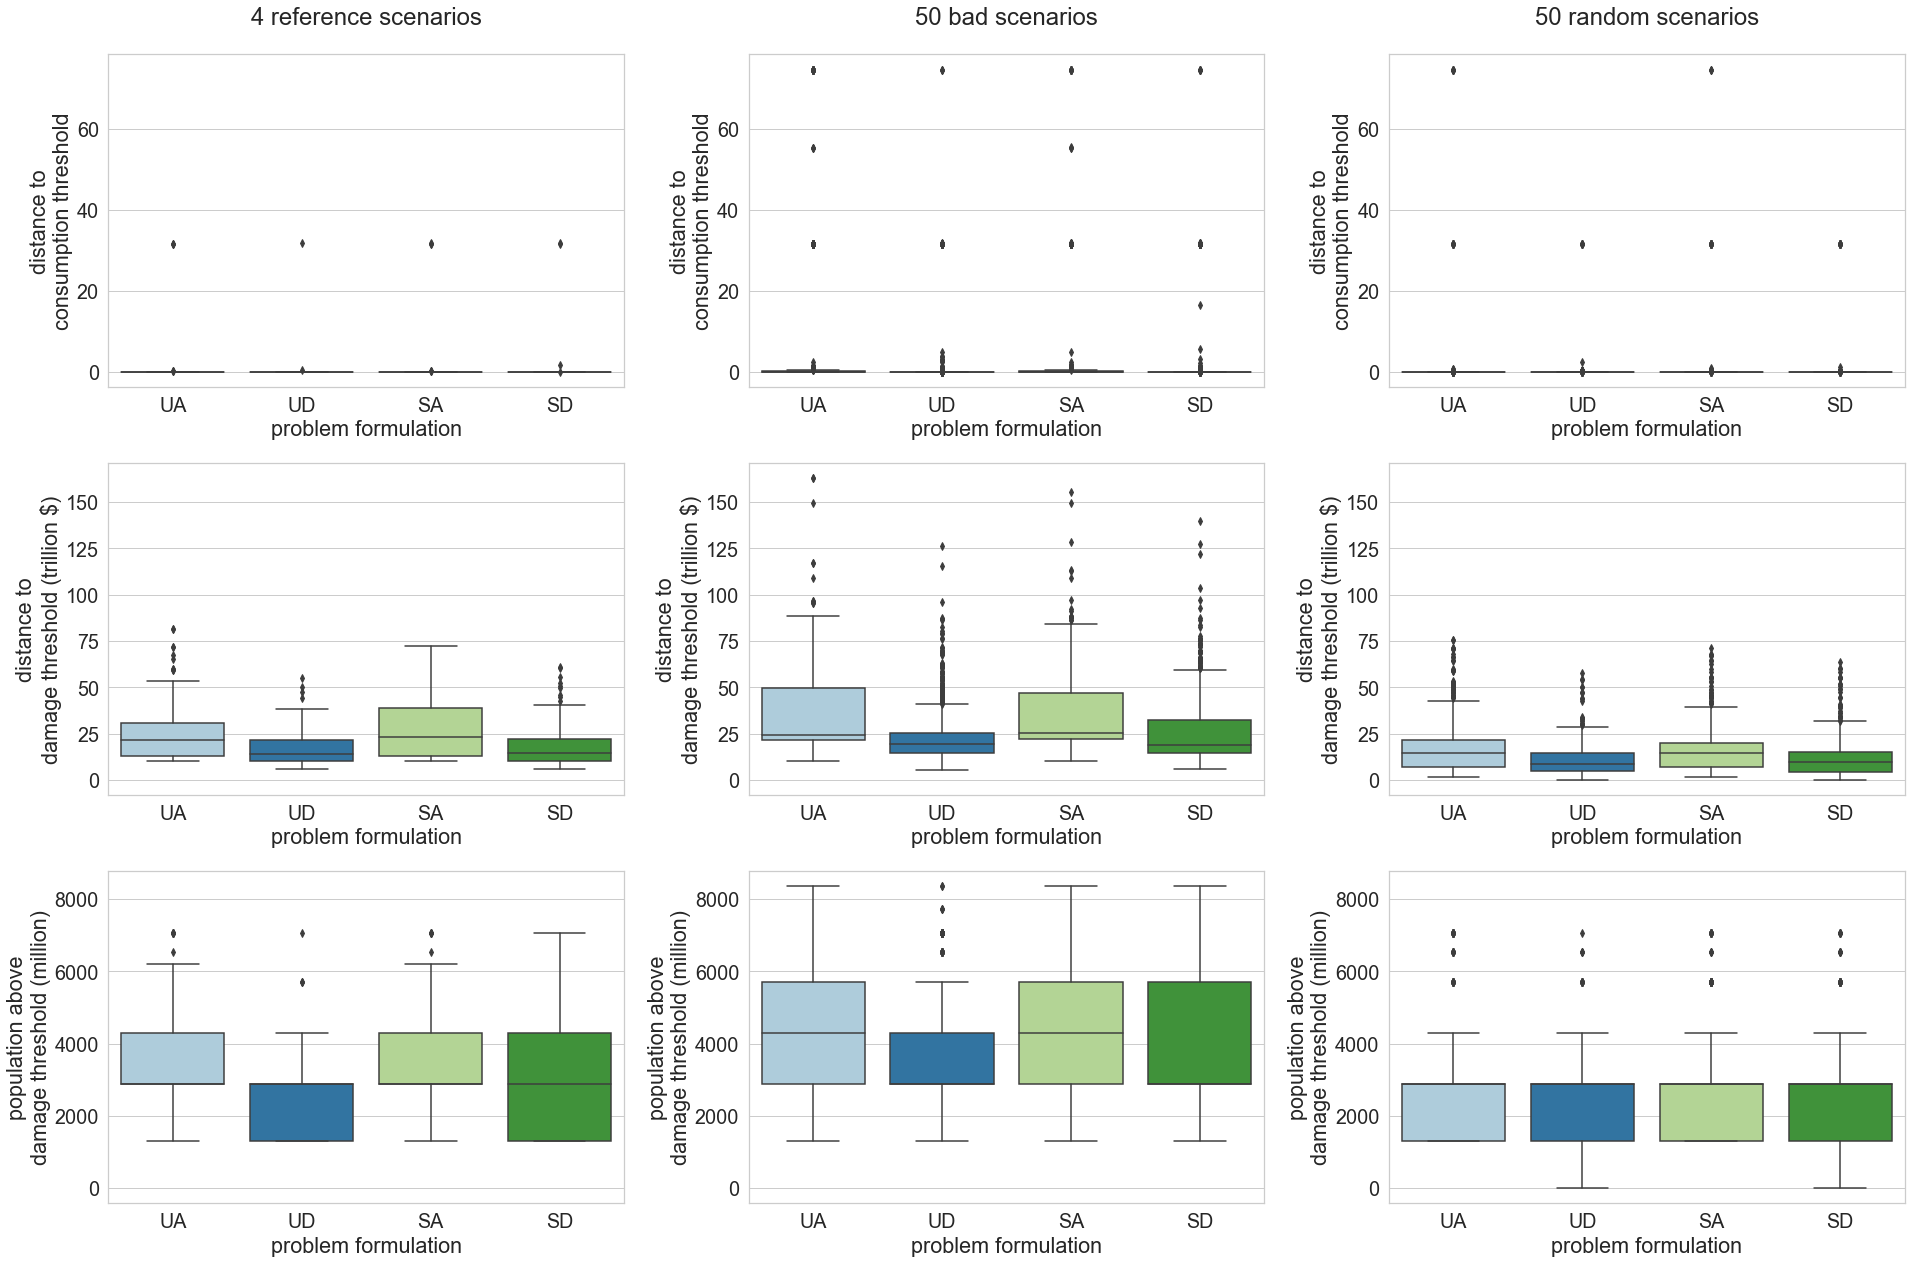

In [12]:
outcome_names = [
    "Distance to consumption threshold",
    # "Population below consumption threshold",
    "Distance to damage threshold",
    "Population above damage threshold",
]

plot_boxplots(
    dict_list=dict_list,
    outcome_names=outcome_names,
    year=year,
    saving=True,
    file_name='boxplots_suffs'
)

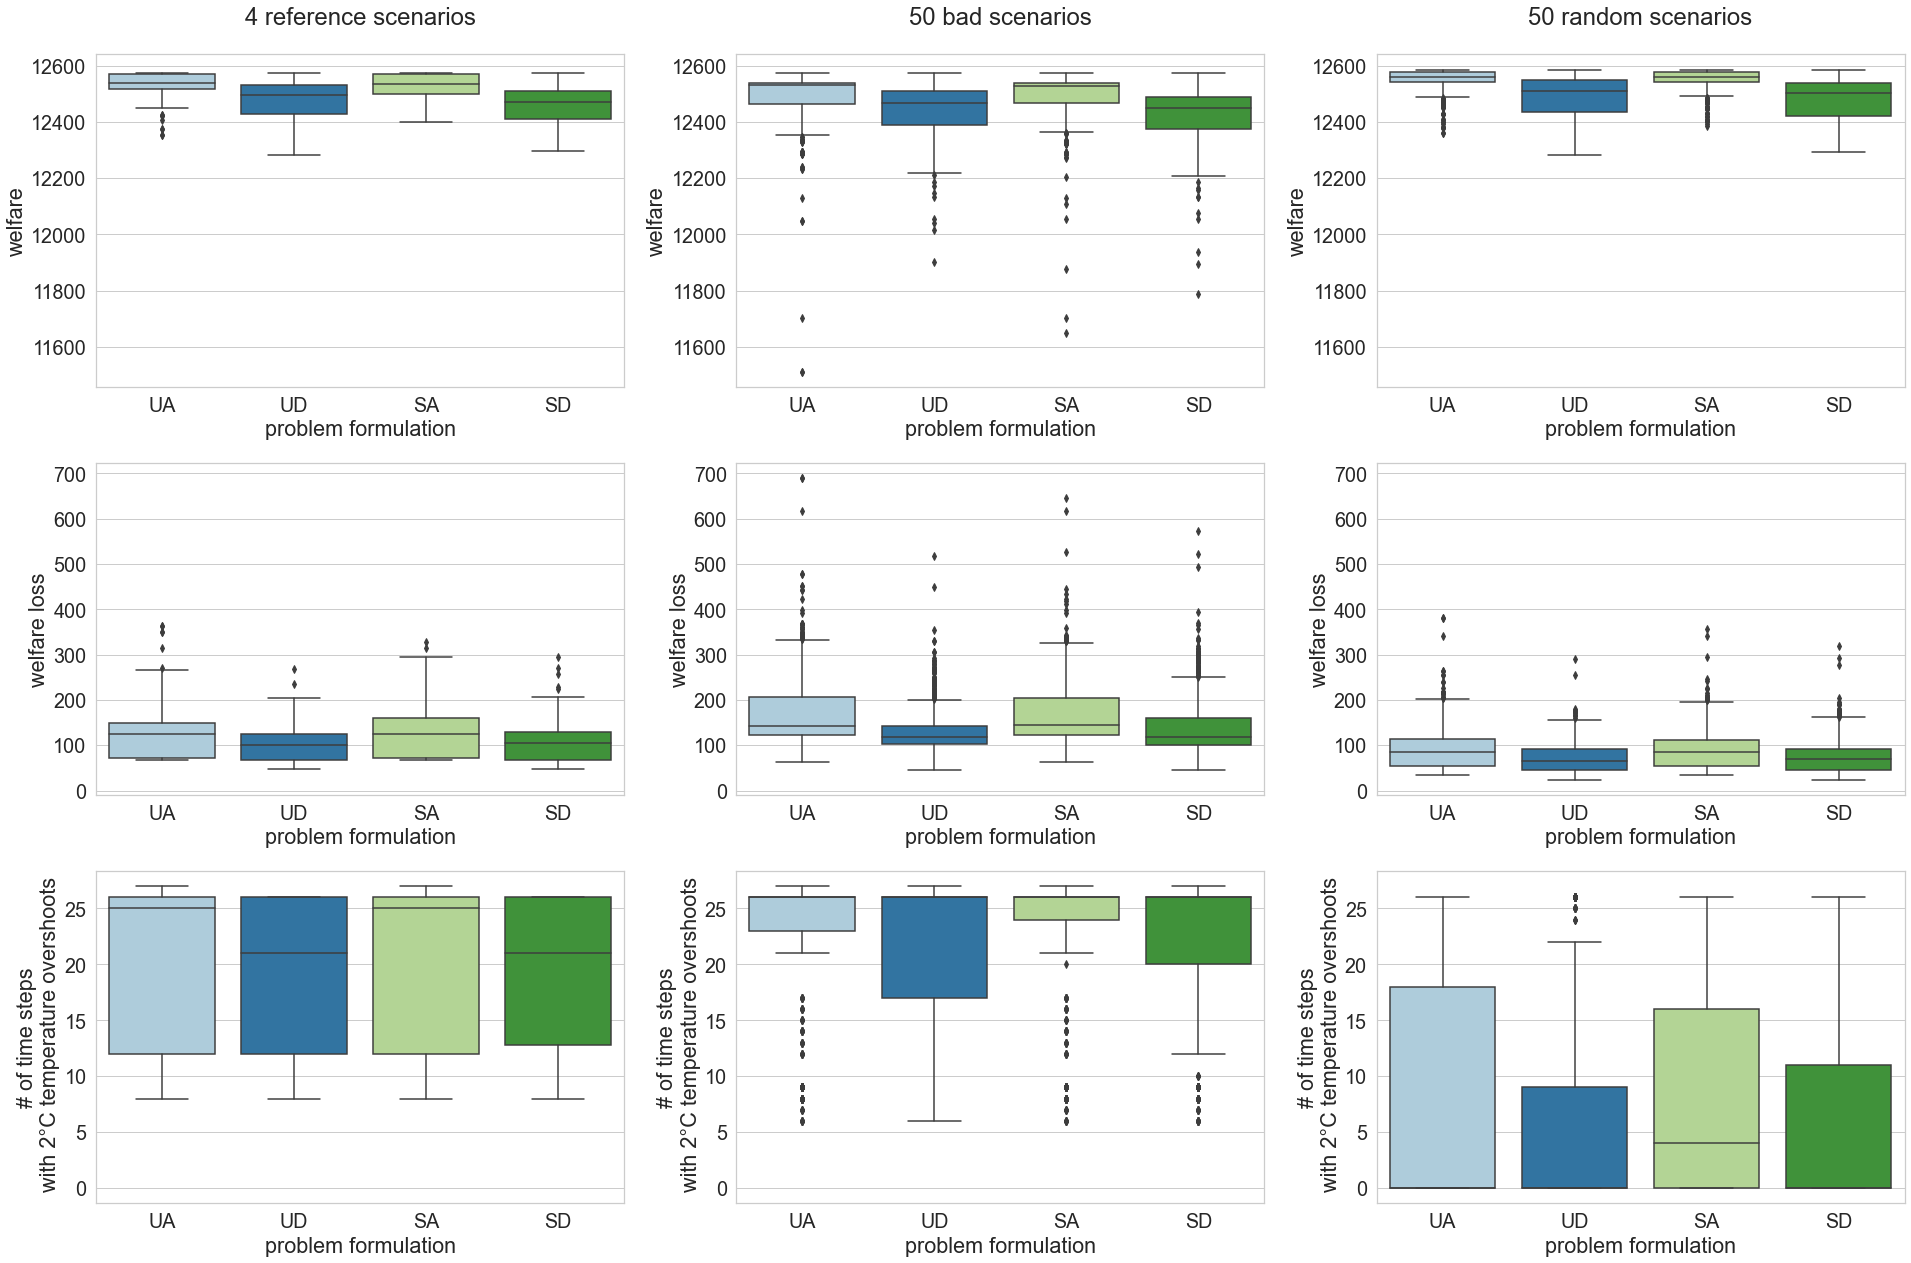

In [11]:
outcome_names = [
    'Utility',
    'Disutility',
    'Temperature overshoot',
]

year = 2305

plot_boxplots(
    dict_list=dict_list,
    outcome_names=outcome_names,
    year=year,
    saving=True,
    file_name='boxplots_welfare_loss_overshoots_2305'
)